In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "pakbro00001"
os.environ['KAGGLE_KEY'] = "63b48a868d9f8779aa53345d24ce8ace"
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 223MB/s]
100% 1.06G/1.06G [00:04<00:00, 235MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [45]:
from keras.models import load_model
import keras
import numpy as np

def load_image(path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(path,target_size=(190,190))
    img_array = np.array(img)
    img_array=img_array.reshape(1,190,190,3)
    return img_array

img = load_image('/content/dogs_vs_cats/train/dogs/dog.0.jpg')
model = load_model('/content/trained_model.h5')
result = model.predict(img)

print(result[0])


1/1 [==============================] - 0s 265ms/step
[1.]


In [5]:
import os
from os import listdir
new_dir = '/content/dogandcat'
os.mkdir(new_dir)


In [14]:
from os import listdir
from shutil import copyfile

count=0
src_directory = '/content/train/cats'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = new_dir
 if file.startswith('cat'):
  dst = dst_dir + '/' + file
  copyfile(src, dst)

src_directory = '/content/train/dogs'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = new_dir
 if file.startswith('dog'):
  dst = dst_dir + '/' + file
  copyfile(src, dst)

src_directory = '/content/test/cats'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = new_dir
 if file.startswith('cat'):
  dst = dst_dir + '/' + file
  copyfile(src, dst)

src_directory = '/content/test/dogs'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = new_dir
 if file.startswith('dog'):
  dst = dst_dir + '/' + file
  copyfile(src, dst)

dir_data_list = os.listdir(new_dir)
print(len(dir_data_list))

25000


In [ ]:
import numpy as np
def load_image(path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(path,target_size=(190,190))
    img_array = np.array(img)
    img_array=img_array.reshape(1,190,190,3)
    return img_array

file_path = '/content/dogandcat'
array=[]
for x in os.listdir(file_path):
    if x.endswith(".jpg"):
      path="/content/dogandcat/"+x
      prediction = model.predict([load_image(path)])
      if prediction>[[0.5]]:
        array.append([prediction[0][0],x,1])
      else:
        array.append([prediction[0][0],x,0])

#print(array)

In [47]:
import numpy as np
array.sort(key= lambda array: array[0])

np.savetxt("predict_values.csv", 
           array,
           delimiter =",", 
           fmt ='% s')

1/1 [==============================] - 0s 47ms/step


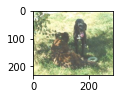

dog.1662.jpg


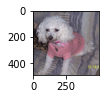

dog.7954.jpg


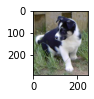

dog.603.jpg


In [42]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = '/content/dogandcat/'

sample_img = load_image(path)
prediction = model.predict(sample_img)

count=0
for i in array:
  if i[0] == prediction[0][0]:
    count=count+1
    pyplot.subplot(330 + 1 + count)
    filename = folder + i[1]
    image = imread(filename)
    pyplot.imshow(image)
    pyplot.show()
    print(i[1])
    if count == 3:
      break